## This notebook serves the purpose of cleaning, visualizing and analysing the data retrieved from the continente website.

In [1]:
import pandas as pd 
continente = pd.read_csv('data-final.csv')
continente.head()

,Unnamed: 0,time_scraped,quantity,main_category,name,amount,unit,price,price_p_unit,currency,id,brand,full_category,variant,channel
0,0,16/05/2023 23:28:29,120 GR (PESO ESCORRIDO 86 GR) | 14.19 €/KG,mercearia,Atum em Azeite,120 GR,KG,1.22,14.19,€,2076239,Ramirez,Mercearia/Conservas/Atum,NaN,col
1,1,16/05/2023 23:28:29,64 UN | 0.30 €/UN,mercearia,Cápsulas de Café Buondi Int 8,64 UN,UN,18.99,0.30,€,7405690,Dolce Gusto,"Mercearia/Café, Chá e Chocolate Solúvel/Café e...",NaN,col
2,2,16/05/2023 23:28:29,120 GR (PESO ESCORRIDO 78 GR) | 32.44 €/KG,mercearia,Atum Filetes em Azeite,120 GR,KG,2.53,32.44,€,2113579,Tenorio,Mercearia/Conservas/Atum,NaN,col
3,3,16/05/2023 23:28:29,1 KG | 1.59 €/KG,mercearia,Arroz Agulha,1 KG,KG,1.59,1.59,€,2305902,Cigala,"Mercearia/Arroz, Massa e Farinha/Arroz",NaN,col
4,4,16/05/2023 23:28:29,150 GR | 17.93 €/KG,mercearia,Batata Frita Gourmet Lisa Corte Fino,150 GR,KG,2.69,17.93,€,7106089,Lays Gourmet,Mercearia/Snacks e Batatas Fritas/Batatas Fritas,NaN,col


### We're new at this, but we already can say by experience that is always a good practice working on a copy of the dataframe. 

In [2]:
conti = continente.copy()

### We'll remove the columns 'unnamed', 'variant' and 'channel'

In [3]:
conti.drop(['Unnamed: 0', 'variant', 'channel'], axis = 1, inplace = True)

In [4]:
conti.shape

(12251, 12)

In [5]:
conti.columns

Index(['time_scraped', 'quantity', 'main_category', 'name', 'amount', 'unit',
       'price', 'price_p_unit', 'currency', 'id', 'brand', 'full_category'],
      dtype='object')

### Let's clean the dataset! First, we have to calculate the values of the 'amount' column to the unit of measure we're using. For example, the amount of the product 'Atum em Azeite' is 120 G. The price per product is 1.22 € and the price per KG is 14.19 €. So, we have to change the value 120 (G) in the 'amount' column to 0,12 (KG).

In [6]:
conti

## For grams: Onde na 'amount' is "GR" divide the number by 100. 

,time_scraped,quantity,main_category,name,amount,unit,price,price_p_unit,currency,id,brand,full_category
0,16/05/2023 23:28:29,120 GR (PESO ESCORRIDO 86 GR) | 14.19 €/KG,mercearia,Atum em Azeite,120 GR,KG,1.22,14.19,€,2076239,Ramirez,Mercearia/Conservas/Atum
1,16/05/2023 23:28:29,64 UN | 0.30 €/UN,mercearia,Cápsulas de Café Buondi Int 8,64 UN,UN,18.99,0.30,€,7405690,Dolce Gusto,"Mercearia/Café, Chá e Chocolate Solúvel/Café e..."
2,16/05/2023 23:28:29,120 GR (PESO ESCORRIDO 78 GR) | 32.44 €/KG,mercearia,Atum Filetes em Azeite,120 GR,KG,2.53,32.44,€,2113579,Tenorio,Mercearia/Conservas/Atum
3,16/05/2023 23:28:29,1 KG | 1.59 €/KG,mercearia,Arroz Agulha,1 KG,KG,1.59,1.59,€,2305902,Cigala,"Mercearia/Arroz, Massa e Farinha/Arroz"
4,16/05/2023 23:28:29,150 GR | 17.93 €/KG,mercearia,Batata Frita Gourmet Lisa Corte Fino,150 GR,KG,2.69,17.93,€,7106089,Lays Gourmet,Mercearia/Snacks e Batatas Fritas/Batatas Fritas
...,...,...,...,...,...,...,...,...,...,...,...,...
12246,17/05/2023 02:38:28,150 GR | 9.93 €/KG,refeicoes-faceis,Massa Fusilli com Pesto,150 GR,KG,1.49,9.93,€,4374082,Continente,"Mercearia/Arroz, Massa e Farinha/Massa"
12247,17/05/2023 02:38:28,160 GR (2 UN) | 21.19 €/KG,refeicoes-faceis,Hambúrguer Sementes sem Glúten,160 GR,KG,3.39,21.19,€,6561375,Veg In,Peixaria e Talho/Alternativas Vegetarianas
12248,17/05/2023 02:38:28,250 GR | 2.19 €/UN,refeicoes-faceis,Tagliatelle Fresco Biológico,250 GR,UN,2.19,2.19,€,7551410,Casa Milo,Bio e Escolhas Alimentares/Biológicos/Ingredie...
12249,17/05/2023 02:38:28,1 UN (APROX. 85 GR) | 14.00 €/KG,refeicoes-faceis,Pastel com Salmão,1 UN,KG,1.19,14.00,€,7600279,Dona Quina,Padaria e Pastelaria/Pastelaria/Pastelaria Sal...


### Test zone to clearify some assumptions and retrive information related. We have some incoherencies in the column 'unit'

In [7]:
conti['unit'].value_counts()

KG     9793
LT     1214
UN     1160
 KG      36
KG       20
DOZ      17
 LT       4
LT        3
UN        2
 UN       1
M         1
Name: unit, dtype: int64

### Lets strip the whitespaces that were provoking the incoherencies and check again. Then, let's check which products have unit 'DOZ'. 

In [8]:
conti['unit'] = conti['unit'].str.strip()

conti['unit'].value_counts()

KG     9849
LT     1221
UN     1163
DOZ      17
M         1
Name: unit, dtype: int64

### Let's check what DOZ unit is... We can see through ID that the product "Ovos Ar Livre" is duplicated...

In [9]:
conti.loc[conti['unit'] == 'DOZ']

,time_scraped,quantity,main_category,name,amount,unit,price,price_p_unit,currency,id,brand,full_category
6076,17/05/2023 01:04:36,6 UN | 4.50 €/DOZ,bio-e-escolhas-alimentares,Ovos Ar Livre,6 UN,DOZ,2.25,4.50,€,7453999,Continente Bio,Laticínios e Ovos/Ovos
8501,17/05/2023 01:42:54,12 UN | 2.40 €/DOZ,laticinios-e-ovos,Ovos de Solo Classe M,12 UN,DOZ,2.40,2.40,€,7284496,Continente,Laticínios e Ovos/Ovos
8505,17/05/2023 01:42:54,6 UN | 4.50 €/DOZ,laticinios-e-ovos,Ovos Ar Livre,6 UN,DOZ,2.25,4.50,€,7453999,Continente Bio,Laticínios e Ovos/Ovos
8509,17/05/2023 01:42:55,12 UN | 2.59 €/DOZ,laticinios-e-ovos,Ovos de Solo Classe L,12 UN,DOZ,2.59,2.59,€,7066777,Continente,Laticínios e Ovos/Ovos
8518,17/05/2023 01:42:55,12 UN | 2.81 €/DOZ,laticinios-e-ovos,Ovos de Ar Livre Classe M/L,12 UN,DOZ,2.81,2.81,€,6664918,Matinados,Laticínios e Ovos/Ovos
8528,17/05/2023 01:43:15,6 UN | 3.94 €/DOZ,laticinios-e-ovos,Ovos de Solo Classe XL,6 UN,DOZ,1.97,3.94,€,6903601,Continente,Laticínios e Ovos/Ovos
8532,17/05/2023 01:43:15,6 UN | 3.00 €/DOZ,laticinios-e-ovos,Ovos Ar Livre Classe M/L,6 UN,DOZ,1.50,3.00,€,6805484,Continente,Laticínios e Ovos/Ovos
8558,17/05/2023 01:43:41,6 UN | 4.34 €/DOZ,laticinios-e-ovos,Ovos Classe M/L,6 UN,DOZ,2.17,4.34,€,7377516,Matinados,Laticínios e Ovos/Ovos
8607,17/05/2023 01:44:20,6 UN | 2.90 €/DOZ,laticinios-e-ovos,Ovos de Ar Livre Classe M/L,6 UN,DOZ,1.45,2.90,€,2501358,Matinados,Laticínios e Ovos/Ovos
8616,17/05/2023 01:44:34,6 UN | 2.80 €/DOZ,laticinios-e-ovos,Ovos de Solo Classe L,6 UN,DOZ,1.40,2.80,€,6805482,Continente,Laticínios e Ovos/Ovos


### But the product "Ovos Ar Livre" doesn't appear as duplicated. Might be because of the information on the column 'main_category' is different

In [10]:
duplicated_r = conti[conti.duplicated()]
duplicated_r

,time_scraped,quantity,main_category,name,amount,unit,price,price_p_unit,currency,id,brand,full_category
5571,17/05/2023 00:59:21,200 GR | 14.95 €/KG,frutas-e-legumes,Mirtilo,200 GR,KG,2.99,14.95,€,7069275,Beira Baga,Frutas e Legumes/Frutas/Morango e Frutos Verme...
5650,17/05/2023 01:00:02,300 GR | 6.87 €/KG,frutas-e-legumes,Espinafre,300 GR,KG,2.06,6.87,€,5527045,Vitacress,"Frutas e Legumes/Legumes/Couves, Brócolos e Es..."
5729,17/05/2023 01:00:47,200 GR | 14.95 €/KG,frutas-e-legumes,Amora do Algarve,200 GR,KG,2.99,14.95,€,7201219,Beira Baga,Frutas e Legumes/Frutas/Morango e Frutos Verme...
5730,17/05/2023 01:00:47,1/2 COUVE = 550 GR | 0.71 €/UN,frutas-e-legumes,Metade Couve Roxa,1/2 COUVE,UN,1.29,0.71,€,6219573,Continente,"Frutas e Legumes/Legumes/Couves, Brócolos e Es..."
5828,17/05/2023 01:01:23,400 GR | 6.23 €/KG,frutas-e-legumes,Beringela Biológica,400 GR,KG,2.49,6.23,€,7380498,Continente Bio,"Frutas e Legumes/Legumes/Curgete, Beringela e ..."
5928,17/05/2023 01:02:51,150 GR | 13.27 €/KG,frutas-e-legumes,Cogumelo Pleurothus Biológico,150 GR,KG,1.99,13.27,€,7559249,Continente Bio,"Frutas e Legumes/Legumes/Cogumelos, Espargos e..."
10885,17/05/2023 02:20:07,330 ML (6 UN) | 21.18 €/LT,congelados,Gelado Mini Double Starchaser,330 ML,LT,6.99,21.18,€,7724757,Magnum,Congelados/Gelados/Gelados Multipacks
11107,17/05/2023 02:22:29,390 ML (6 UN) | 7.92 €/LT,congelados,Gelado Super Maxi,390 ML,LT,3.09,7.92,€,4712309,Olá,Congelados/Gelados/Gelados Multipacks
11189,17/05/2023 02:23:02,360 ML (6 UN) | 8.58 €/LT,congelados,Gelado Disney Frozen Olaf,360 ML,LT,3.09,8.58,€,7558972,Olá,Congelados/Gelados/Gelados Multipacks
11258,17/05/2023 02:24:02,250 GR (2 UN) | 11.96 €/KG,congelados,Veggie Hambúrgueres,250 GR,KG,2.99,11.96,€,5508371,Iglo Green Cuisine,Congelados/Hambúrgueres e Refeições/Hambúrgueres


In [11]:
###We now want to isolate the numeric amount and standardize units to the match the unit column, let's check the different formats in this variable

In [12]:
amount_list = conti["amount"]

In [13]:
amount_list.unique()

array(['120 GR', '64 UN', '1 KG', '150 GR', '500 GR', '200 GR', '270 GR',
       '600 GR', '1 LT', '10 UN', '75 CL', '5 X', '800 GR', '80 UN',
       '208 GR', '188 GR', '250 GR', '2 X', '160 GR', '310 GR', '410 GR',
       'NONE QUANTITY', '3 LT', '3 X', '390 GR', '400 GR', '540 GR',
       '380 GR', '355 GR', '625 GR', '550 GR', '90 GR', '1,5 LT',
       '385 GR', '240 GR', '845 GR', '220 GR', '350 GR', '440 GR', '1 UN',
       '140 GR', '330 GR', '375 GR', '72 GR', '780 GR', '2 LT', '198 GR',
       '110 GR', '170 GR', '85 GR', '820 GR', '750 GR', '480 ML',
       '290 GR', '740 GR', '50 GR', '430 GR', '60 GR', '2,5 KG', '185 GR',
       '4 X', '126 GR', '23,8 GR', '300 GR', '830 GR', '754 GR', '130 GR',
       '258 GR', '900 GR', '80 GR', '250 ML', '700 GR', '225 GR',
       '1,1 KG', '400 ML', '954 GR', '228 GR', '24 UN', '75 GR', '18 UN',
       '70 GR', '420 GR', '180 GR', '100 GR', '20 UN', '168 GR', '460 GR',
       '82,5 GR', '824 GR', '397 GR', '360 GR', '122 GR', '40 UN',
 

In [14]:
#Split on blank space and register the unit to convert to the unit on the dataframe, exception for UN cases
split_list = [i.split(" ") for i in amount_list]

amount = [sublist[0] for sublist in split_list]
unit = [sublist[1] for sublist in split_list]

In [15]:
###We will now clean the amount list before adding it as a column to our dataframe, covering for exceptions where the unit of measure is Units and the value is NONE

In [16]:
for i,j in enumerate(amount):
    list_two_digits_to_multiply = []
    if "KG" in str(j):
        j = j.replace("KG","")
        unit[i] = "KG"
    elif "L" in str(j):
        j = j.replace("L","")
        unit[i] = "L"

    elif "GR" in str(j):
        j = j.replace("GR","")
        unit[i] = "GR"
        
    elif "G" in str(j):
        j = j.replace("G","")
        unit[i] = "GR"
        
    elif "CL" in str(j):
        j = j.replace("CL","")
        unit[i] = "CL"
    elif "/" in str(j):
        list_two_digits_to_multiply.append(str(j).split("/"))
        # print(list_two_digits_to_multiply)
        try:
            amount[i] = float(list_two_digits_to_multiply[0][0])*float(list_two_digits_to_multiply[0][1])
        except:
            # amount[i] = float("nan")
            continue
    elif "X" in str(j):
        list_two_digits_to_multiply.append(str(j).split("X"))
        # print(list_two_digits_to_multiply)
        try:
            amount[i] = float(list_two_digits_to_multiply[0][0])*float(list_two_digits_to_multiply[0][1].replace(",","."))
        except:
            amount[i] = float("nan")
            # continue    
    try:
        amount[i] = float(str(j).replace(",", "."))
    except:
        amount[i] = float("nan")
        # continue


In [17]:
###We need to clean the unit list to facilitate the conversion of amounts

In [ ]:
set(amount)

In [19]:
###Now we will standardize amounts to units of KG or LT 

In [20]:
set(unit)

{'+',
 '1,2',
 '10',
 '150',
 '2,5',
 '200',
 '3,63',
 '400',
 '42,5',
 '680',
 'ABACAXI',
 'BOLA',
 'CL',
 'COUVE',
 'CÁPSULAS',
 'ESCORRIDO:',
 'G',
 'GML',
 'GR',
 'KG',
 'L',
 'LT',
 'MELANCIA',
 'MELÃO',
 'ML',
 'MÍNIMA',
 'QUANTITY',
 'QUEIJO',
 'UN',
 'X'}

In [21]:
list_units_to_keep= ['G', 'GR', 'L','LT','X','UN','CL','KG','ML','DOZ']

for i in range(len(unit)):
    if unit[i] not in list_units_to_keep:
        unit[i] = "NA"

In [22]:
set(unit)

{'CL', 'G', 'GR', 'KG', 'L', 'LT', 'ML', 'NA', 'UN', 'X'}

In [ ]:
###Using our previous unit list, we are going to multiply each amount entry by a specific factor to convert to KG or LT and then add this list as our amount column

In [24]:
for i,j in enumerate(unit):
    try:
        if j == "GR":
            # units[i] = "KG"
            amount[i] = amount[i]/1000
        elif j == "G":
            # units[i] = "L"
            amount[i] = amount[i]/1000 
        elif j == "DOZ":
            # units[i] = "L"
            amount[i] = amount[i]/12               
        elif j == "ML":
            # units[i] = "L"
            amount[i] = amount[i]/1000    
        elif j == "CL":
            # units[i] = "L"
            amount[i] = amount[i]/100  
        elif j == "KG":
            continue
        elif j == "L":
            continue
        elif j == "UN":
            continue
        elif j == "X":
            continue            
        else:
            # units[i] = float("nan")
            amount[i] = float("nan")
    except:
        # units[i] = float("nan")
        amount[i] = float("nan")

In [26]:
conti['amount'] = amount

In [27]:
conti

,time_scraped,quantity,main_category,name,amount,unit,price,price_p_unit,currency,id,brand,full_category
0,16/05/2023 23:28:29,120 GR (PESO ESCORRIDO 86 GR) | 14.19 €/KG,mercearia,Atum em Azeite,0.12,KG,1.22,14.19,€,2076239,Ramirez,Mercearia/Conservas/Atum
1,16/05/2023 23:28:29,64 UN | 0.30 €/UN,mercearia,Cápsulas de Café Buondi Int 8,64.00,UN,18.99,0.30,€,7405690,Dolce Gusto,"Mercearia/Café, Chá e Chocolate Solúvel/Café e..."
2,16/05/2023 23:28:29,120 GR (PESO ESCORRIDO 78 GR) | 32.44 €/KG,mercearia,Atum Filetes em Azeite,0.12,KG,2.53,32.44,€,2113579,Tenorio,Mercearia/Conservas/Atum
3,16/05/2023 23:28:29,1 KG | 1.59 €/KG,mercearia,Arroz Agulha,1.00,KG,1.59,1.59,€,2305902,Cigala,"Mercearia/Arroz, Massa e Farinha/Arroz"
4,16/05/2023 23:28:29,150 GR | 17.93 €/KG,mercearia,Batata Frita Gourmet Lisa Corte Fino,0.15,KG,2.69,17.93,€,7106089,Lays Gourmet,Mercearia/Snacks e Batatas Fritas/Batatas Fritas
...,...,...,...,...,...,...,...,...,...,...,...,...
12246,17/05/2023 02:38:28,150 GR | 9.93 €/KG,refeicoes-faceis,Massa Fusilli com Pesto,0.15,KG,1.49,9.93,€,4374082,Continente,"Mercearia/Arroz, Massa e Farinha/Massa"
12247,17/05/2023 02:38:28,160 GR (2 UN) | 21.19 €/KG,refeicoes-faceis,Hambúrguer Sementes sem Glúten,0.16,KG,3.39,21.19,€,6561375,Veg In,Peixaria e Talho/Alternativas Vegetarianas
12248,17/05/2023 02:38:28,250 GR | 2.19 €/UN,refeicoes-faceis,Tagliatelle Fresco Biológico,0.25,UN,2.19,2.19,€,7551410,Casa Milo,Bio e Escolhas Alimentares/Biológicos/Ingredie...
12249,17/05/2023 02:38:28,1 UN (APROX. 85 GR) | 14.00 €/KG,refeicoes-faceis,Pastel com Salmão,1.00,KG,1.19,14.00,€,7600279,Dona Quina,Padaria e Pastelaria/Pastelaria/Pastelaria Sal...


In [ ]:
###Dropping unnecessary features, renaming and reordering columns to match the pingo doce dataframe structure

In [28]:
conti = conti.rename(columns={'price': 'List_Price', 'price_p_unit': 'Price_per_unit_of_measure', 'main_category': 'Category','name':'Name','currency':'Currency','unit':'Unit','amount':'Amount'})
conti = conti.drop(labels= ['time_scraped', 'quantity', 'time_scraped', 'brand','full_category'], axis=1)
neworder = ['id','Category','Name','Amount','Unit','List_Price','Price_per_unit_of_measure','Currency']
conti = conti.reindex(columns=neworder)
conti

,id,Category,Name,Amount,Unit,List_Price,Price_per_unit_of_measure,Currency
0,2076239,mercearia,Atum em Azeite,0.12,KG,1.22,14.19,€
1,7405690,mercearia,Cápsulas de Café Buondi Int 8,64.00,UN,18.99,0.30,€
2,2113579,mercearia,Atum Filetes em Azeite,0.12,KG,2.53,32.44,€
3,2305902,mercearia,Arroz Agulha,1.00,KG,1.59,1.59,€
4,7106089,mercearia,Batata Frita Gourmet Lisa Corte Fino,0.15,KG,2.69,17.93,€
...,...,...,...,...,...,...,...,...
12246,4374082,refeicoes-faceis,Massa Fusilli com Pesto,0.15,KG,1.49,9.93,€
12247,6561375,refeicoes-faceis,Hambúrguer Sementes sem Glúten,0.16,KG,3.39,21.19,€
12248,7551410,refeicoes-faceis,Tagliatelle Fresco Biológico,0.25,UN,2.19,2.19,€
12249,7600279,refeicoes-faceis,Pastel com Salmão,1.00,KG,1.19,14.00,€


In [30]:
conti.isnull().sum()

id                             0
Category                       0
Name                           0
Amount                       487
Unit                           0
List_Price                     0
Price_per_unit_of_measure      0
Currency                       0
dtype: int64

In [31]:
conti.dropna(inplace=True)

In [32]:
conti.duplicated().sum()

499

In [33]:
conti.drop_duplicates(inplace=True)

In [34]:
conti.duplicated().sum()

0

In [ ]:
###Export the clean dataframe to a csv for concatenation

In [36]:
# file_path = r'C:\Users\rafae\Downloads\conti.csv'

# conti.to_csv(file_path, encoding="utf-8")

In [37]:
### Main descriptive statistics for all the numerical values. The average of the price per products is 3 € while the price per unit of measure if 14 €. From this statistical description we got curious to know which product costs 956 per unit of measure. Then, we remembered... the spices are expensive!!!

In [38]:
conti.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,11265.0,1.605516,7.127997,0.00055,0.15,0.30,0.50,300.00
List_Price,11265.0,3.633755,4.728534,0.15000,1.69,2.59,3.99,179.24


In [39]:
conti.dtypes

id                            object
Category                      object
Name                          object
Amount                       float64
Unit                          object
List_Price                   float64
Price_per_unit_of_measure     object
Currency                      object
dtype: object

In [1]:
###Visualizations and exploratory analysis

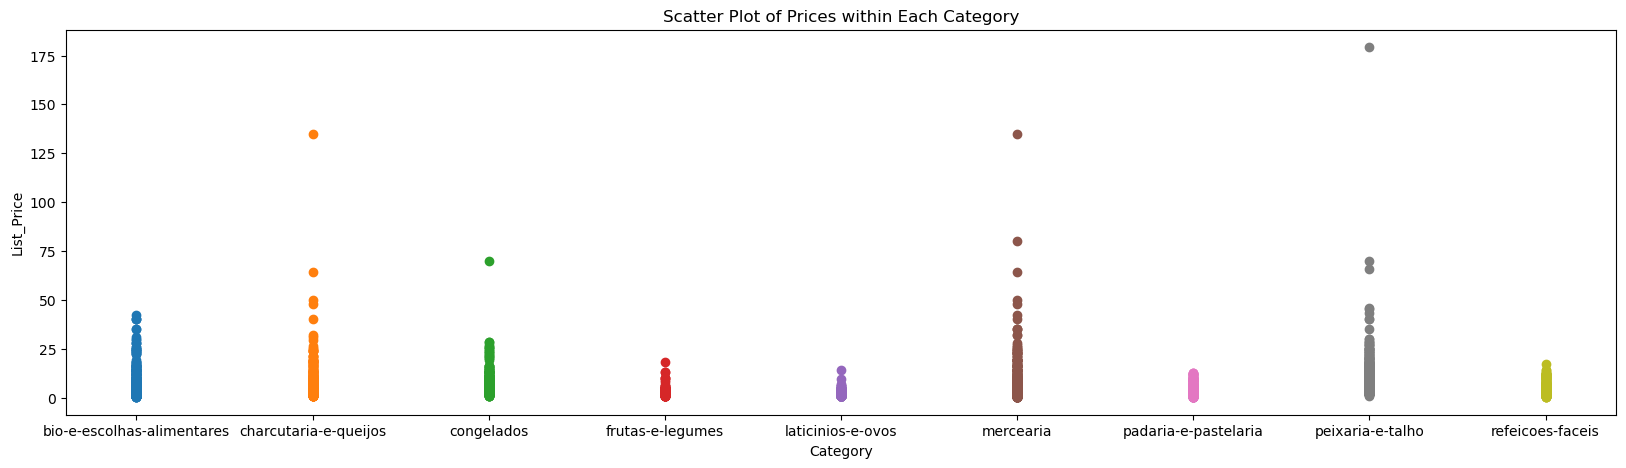

In [40]:
import matplotlib.pyplot as plt

# Group the data by 'Category'
grouped_data = conti.groupby("Category")
fig, ax = plt.subplots(figsize=(20,5))

# Plot scatter plot for each category
for category, data in grouped_data:
    plt.scatter(data["Category"], data["List_Price"], label=category)
# Customize the plot
plt.xlabel("Category")
plt.ylabel("List_Price")
plt.title("Scatter Plot of Prices within Each Category")
plt.show()

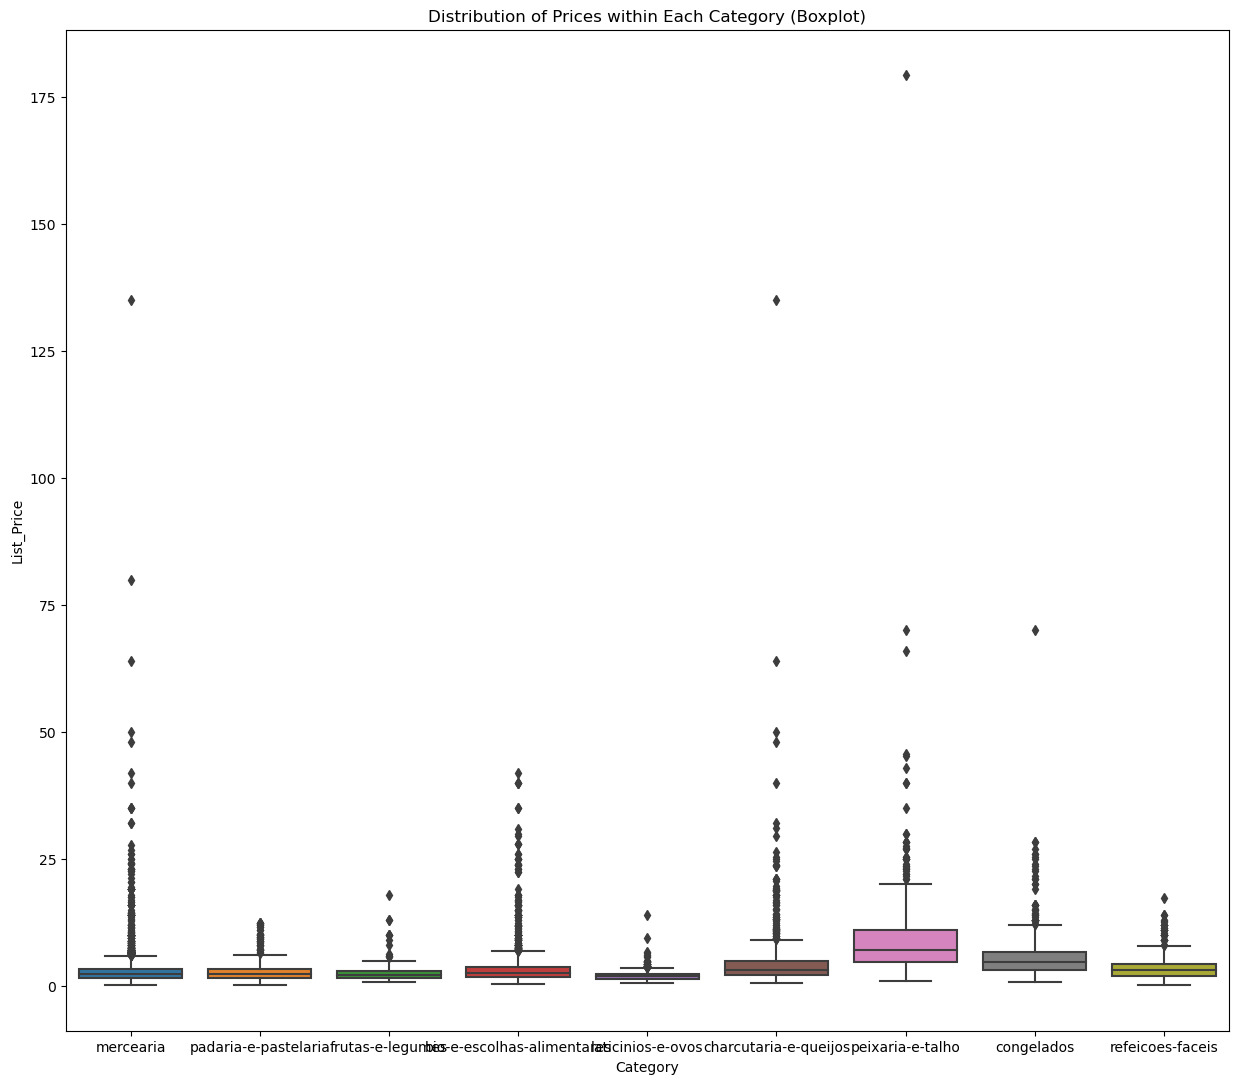

In [41]:
import seaborn as sns

plt.figure(figsize=(15, 13))
sns.boxplot(data=conti, x='Category', y='List_Price')
plt.xlabel('Category')
plt.ylabel('List_Price')
plt.title('Distribution of Prices within Each Category (Boxplot)')
plt.show()

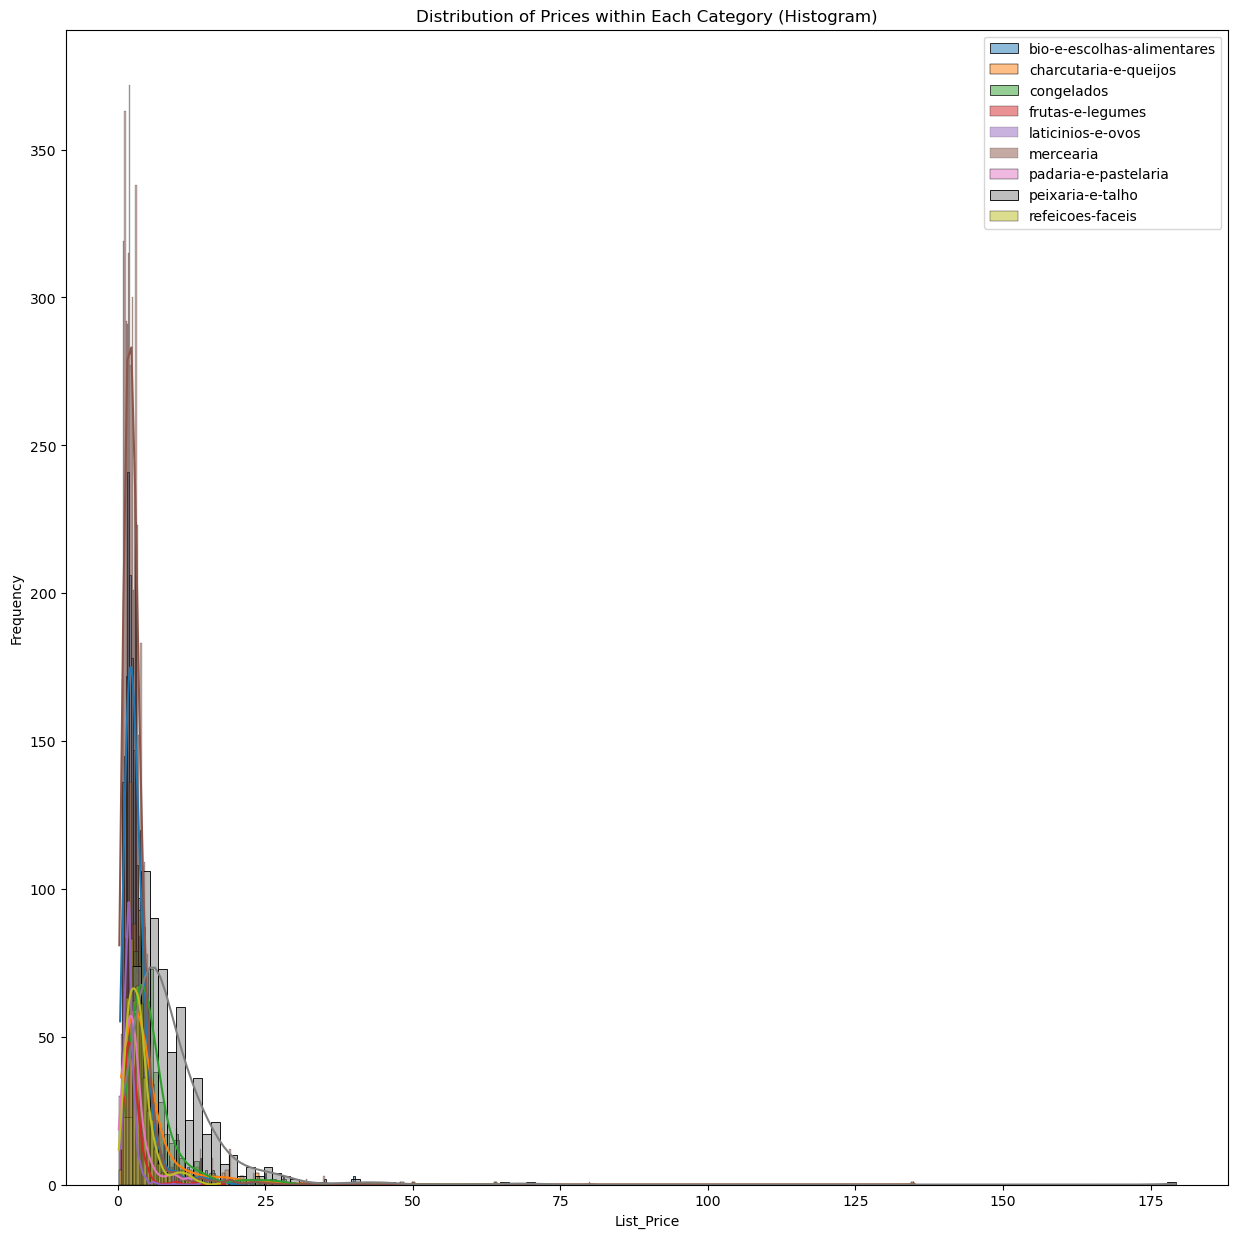

In [42]:

plt.figure(figsize=(15, 15))
for category, data in grouped_data:
    sns.histplot(data['List_Price'], label=category, kde=True)
plt.xlabel('List_Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices within Each Category (Histogram)')
plt.legend()
plt.show()

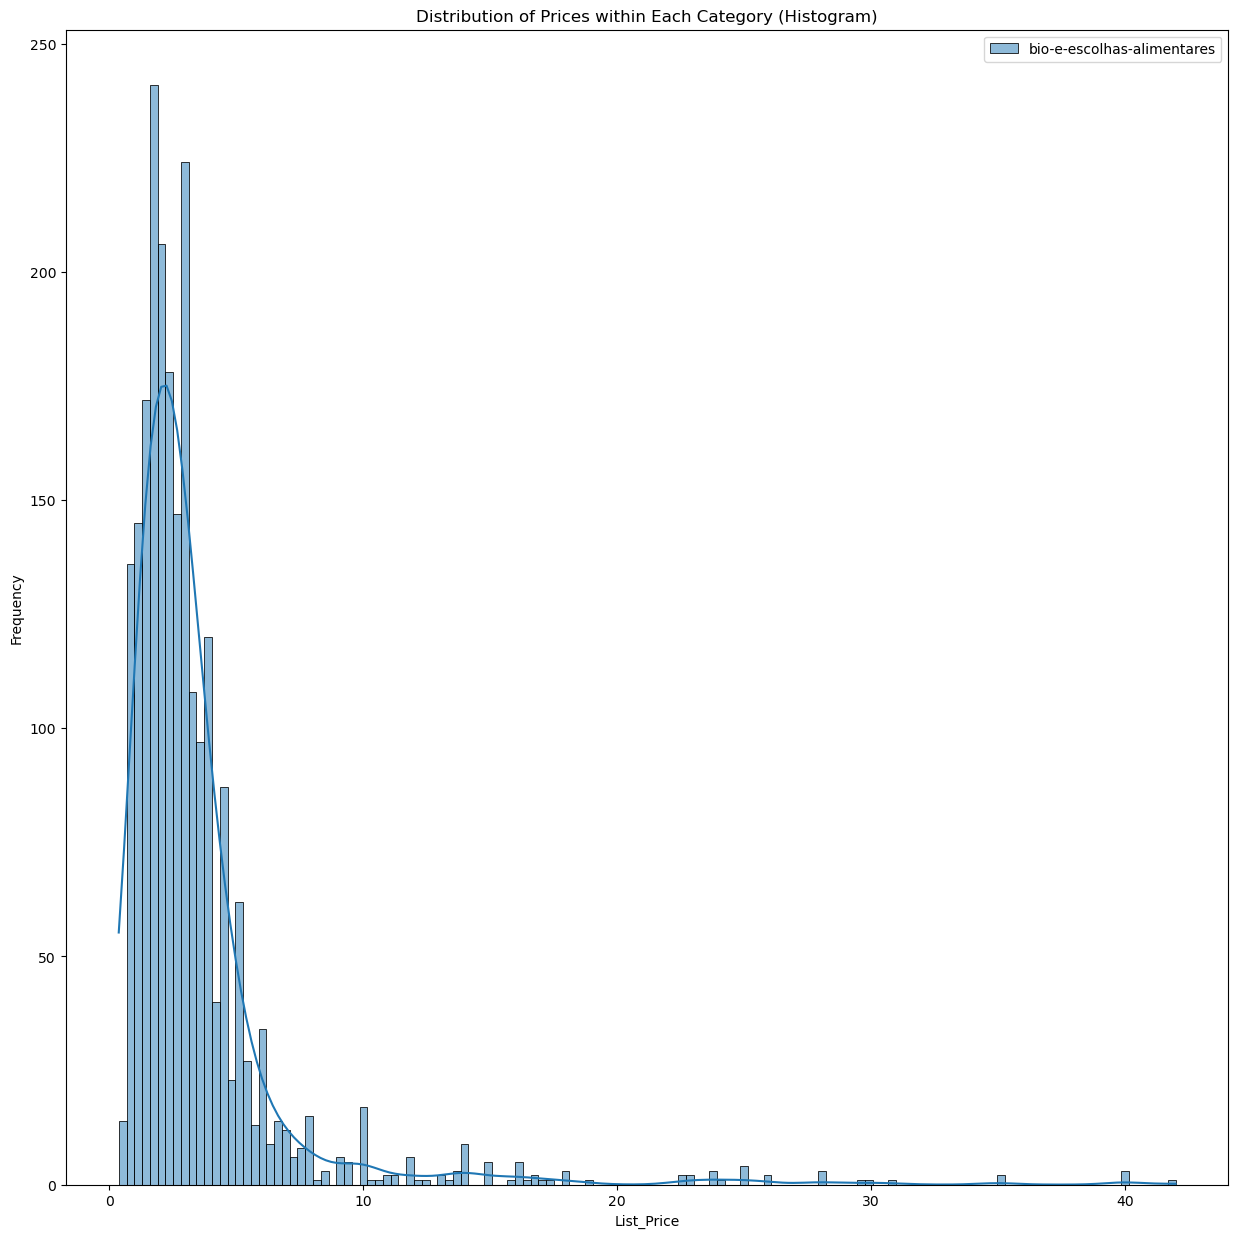

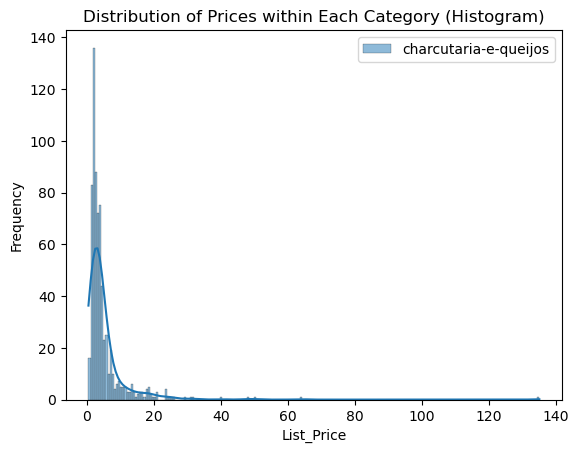

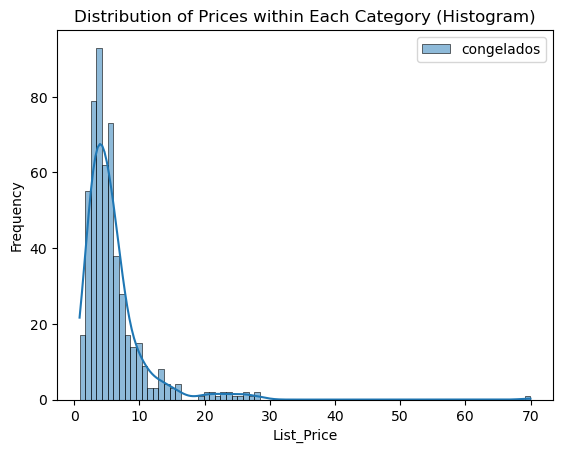

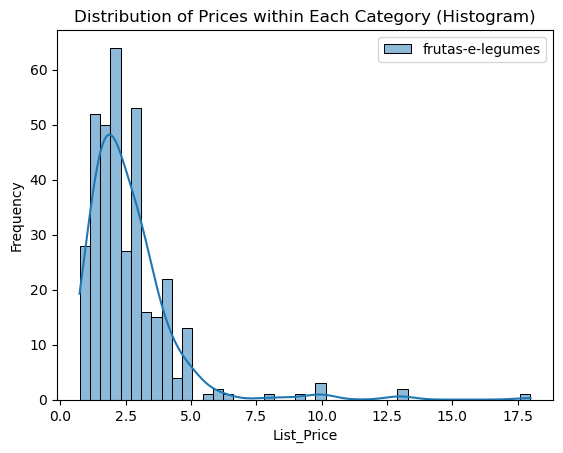

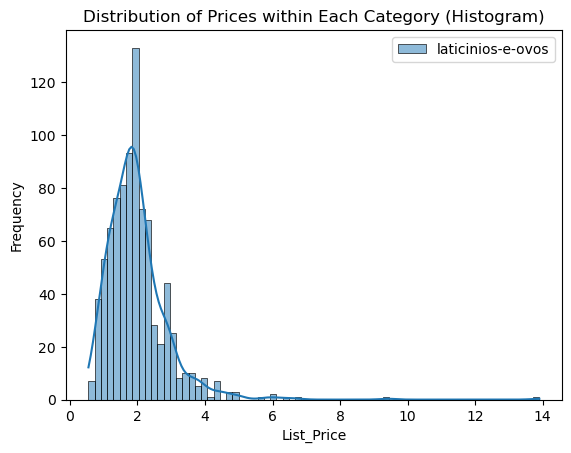

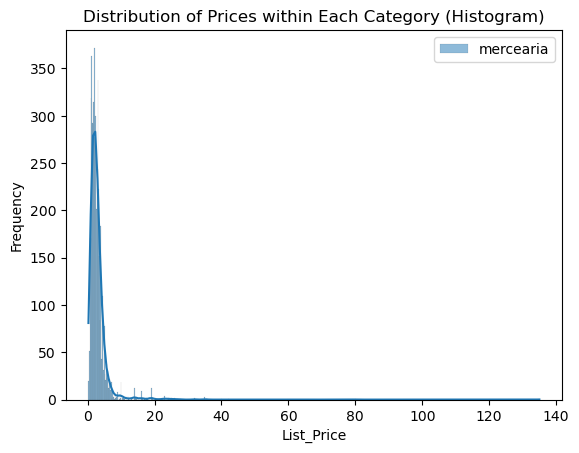

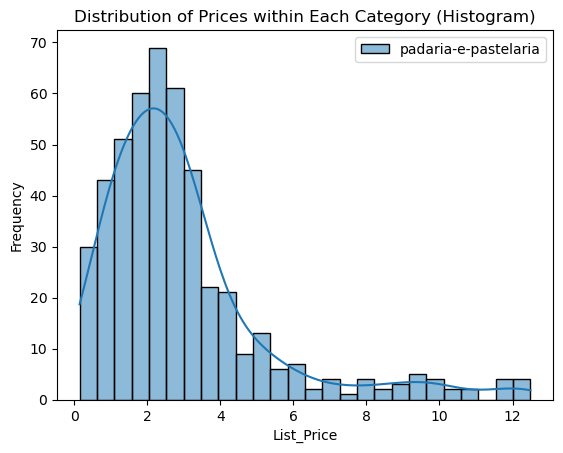

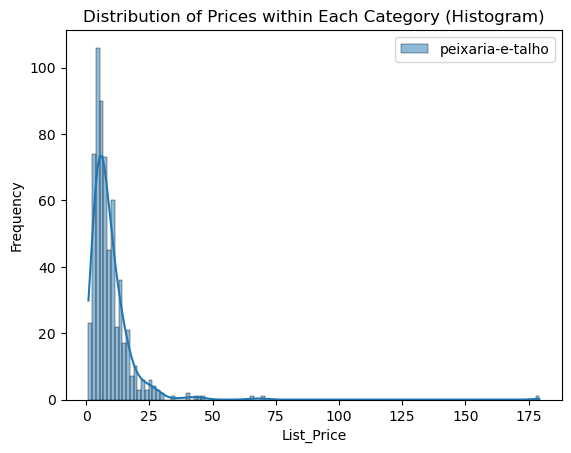

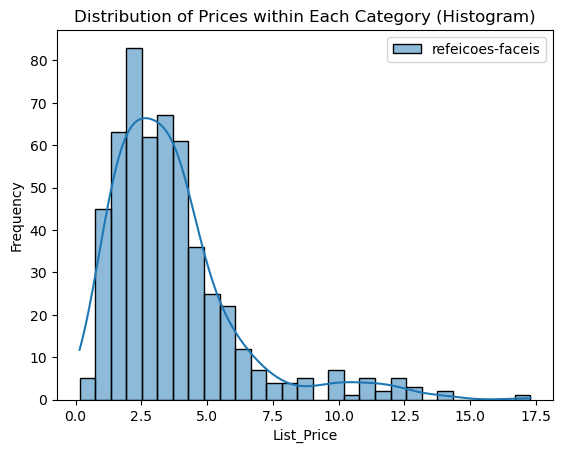

In [43]:
plt.figure(figsize=(15, 15))
for category, data in grouped_data:
    cat = str(category)
    sns.histplot(data['List_Price'], label=category, kde=True)
    plt.xlabel('List_Price')
    plt.ylabel('Frequency')
    plt.title('Distribution of Prices within Each Category (Histogram)')
    plt.legend()
    plt.show()

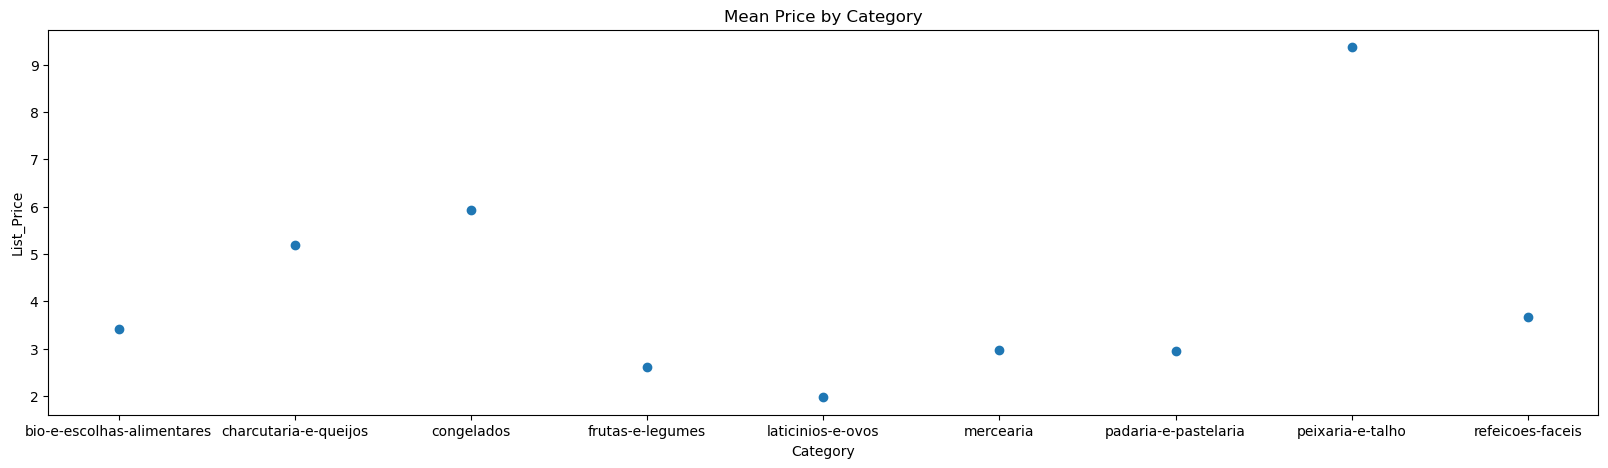

In [44]:
# Group the data by "Category" and calculate the mean price
grouped_data_mean = conti.groupby("Category")["List_Price"].mean().reset_index()

# Plot the scatter plot
fig, ax = plt.subplots(figsize=(20,5))
plt.scatter(grouped_data_mean["Category"], grouped_data_mean["List_Price"])
plt.xlabel("Category")
plt.ylabel("List_Price")
plt.title("Mean Price by Category")
plt.show()

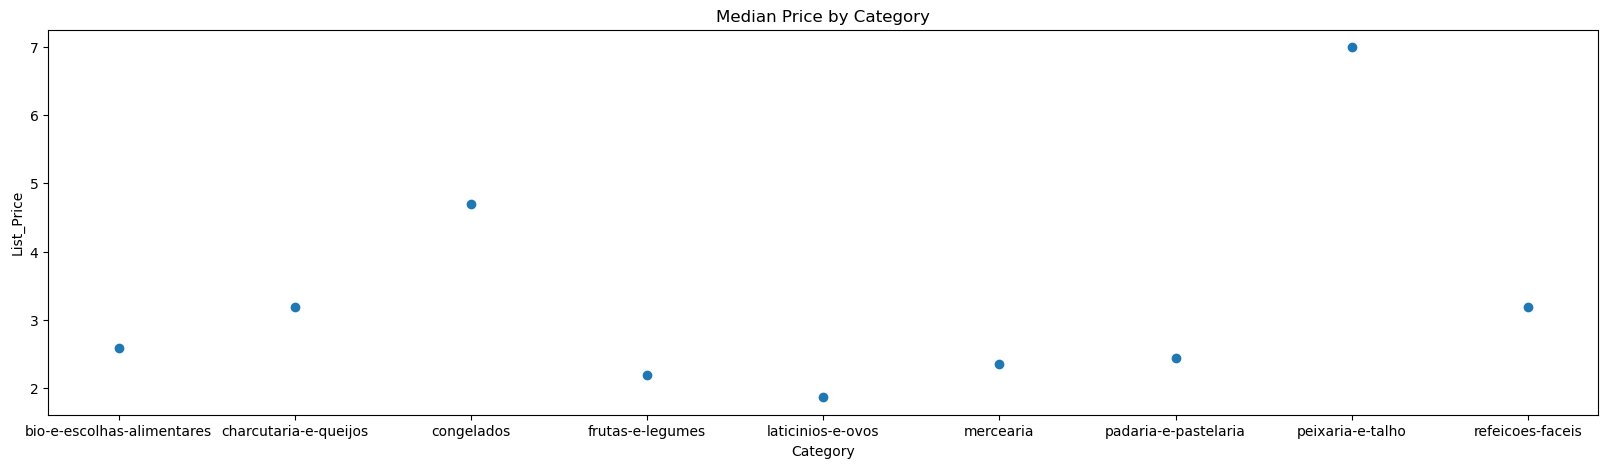

In [45]:
# Group the data by "Category" and calculate the median price
grouped_data_median = conti.groupby("Category")["List_Price"].median().reset_index()

# Plot the scatter plot
fig, ax = plt.subplots(figsize=(20,5))
plt.scatter(grouped_data_median["Category"], grouped_data_median["List_Price"])
plt.xlabel("Category")
plt.ylabel("List_Price")
plt.title("Median Price by Category")
plt.show()

In [46]:
grouped_cat_price = conti.groupby("Category")["List_Price"].describe()
grouped_cat_price

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
bio-e-escolhas-alimentares,2245.0,3.418294,3.657025,0.38,1.780,2.59,3.7900,41.99
charcutaria-e-queijos,690.0,5.179725,7.636135,0.55,2.190,3.19,4.9900,134.99
congelados,543.0,5.925451,5.119145,0.83,3.215,4.70,6.7650,69.99
frutas-e-legumes,356.0,2.616854,1.762127,0.74,1.590,2.19,2.9900,17.99
laticinios-e-ovos,866.0,1.976651,0.950111,0.55,1.400,1.87,2.2900,13.90
mercearia,4944.0,2.970220,3.739262,0.25,1.540,2.35,3.3250,134.99
padaria-e-pastelaria,474.0,2.958186,2.323414,0.15,1.500,2.44,3.3975,12.49
peixaria-e-talho,620.0,9.365532,9.895191,0.93,4.640,6.99,10.9900,179.24
refeicoes-faceis,527.0,3.665446,2.462147,0.15,1.990,3.19,4.3900,17.29
